In [2]:
import pandas as pd
import numpy as np

import datetime

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns 

%matplotlib inline

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [4]:
combinedlist = []

df1 = pd.read_csv("data_room1.csv")
len1 = len(df1.index)
label1 = [1]*len1
df1["Label"]=label1
combinedlist.append(df1)

df2 = pd.read_csv("data_room2.csv")
len2 = len(df2.index)
label2 = [2]*len2
df2["Label"]=label2
combinedlist.append(df2)

df3 = pd.read_csv("data_room3.csv")
len3 = len(df3.index)
label3 = [3]*len3
df3["Label"]=label3
combinedlist.append(df3)

dataset = pd.concat(combinedlist, axis=0, ignore_index=True)
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values



# print(len1)
# print(len2)
# print(len3)
# print(df1.head(5))
# print(df2.head(5))
# print(df3.head(5))
# print(combinedlist)



# print(type(df.at[0,"TimeStamp"]))
# print(type(df.at[0,"B_x"]))
# print(type(df.at[0,"B_y"]))
# print(type(df.at[0,"B_z"]))
# print(type(df.at[0,"B_net"]))
# print(dataset.head())
# print(X,y)


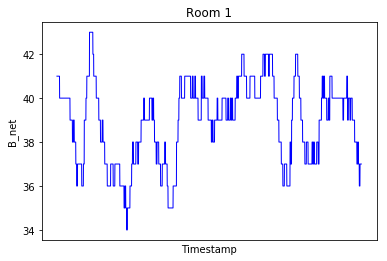

In [5]:
plt.plot(df1.TimeStamp,df1.B_net,label='Room1',color='blue',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('B_net') 
plt.title('Room 1') 
plt.savefig('Room1_train')
plt.show() 


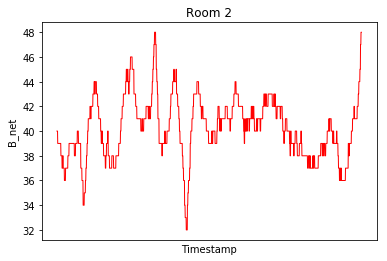

In [6]:
plt.plot(df2.TimeStamp,df2.B_net,label='Room2',color='red',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('B_net') 
plt.title('Room 2') 
plt.savefig('Room2_train')
plt.show() 

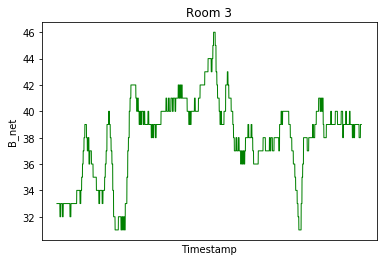

In [10]:
plt.plot(df3.TimeStamp,df3.B_net,label='Room3',color='green',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',          
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('B_net') 
plt.title('Room 3') 
plt.savefig('Room3_train')
plt.show() 

In [3]:
#One vs Rest SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 56)

ovr_classifier = OneVsRestClassifier(SVC(kernel = 'linear', C = 1)).fit(X, y)

pred_train_ovr = ovr_classifier.predict(X_train)
pred_test_ovr = ovr_classifier.predict(X_test)

accuracy_test_ovr = metrics.accuracy_score(y_test, pred_test_ovr)
accuracy_train_ovr = metrics.accuracy_score(y_train, pred_train_ovr)

cm_ovr = confusion_matrix(y_test,pred_test_ovr)


In [4]:
#Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

logistic_classifier = LogisticRegression(penalty='l2',solver='lbfgs',multi_class='ovr')

logistic_classifier.fit(X_train, y_train)

pred_train_lr = logistic_classifier.predict(X_train)
pred_test_lr = logistic_classifier.predict(X_test)

accuracy_test_lr = metrics.accuracy_score(y_test, pred_test_lr)
accuracy_train_lr = metrics.accuracy_score(y_train, pred_train_lr)

cm_lr = confusion_matrix(y_test,pred_test_lr)


In [5]:
# Random Forest Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

room_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
room_classifier.fit(X_train, y_train)

pred_train_rf = room_classifier.predict(X_train)
pred_test_rf = room_classifier.predict(X_test)

accuracy_test_rf = metrics.accuracy_score(y_test, pred_test_rf)
accuracy_train_rf = metrics.accuracy_score(y_train, pred_train_rf)

cm_rf = confusion_matrix(y_test,pred_test_rf)


In [6]:
# Support Vector Machine

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

pred_test_svm = svm_model_linear.predict(X_test)
pred_train_svm = svm_model_linear.predict(X_train)
     
accuracy_test_svm = svm_model_linear.score(X_test, y_test) 
accuracy_train_svm = svm_model_linear.score(X_train,y_train)

cm_svm = confusion_matrix(y_test, pred_test_svm) 

In [7]:
# KNN Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

K_values = [] 
training_scores = [] 
test_scores = [] 
scores = {} 
  
for k in range(2, 20): 
    knn_classifier = KNeighborsClassifier(n_neighbors = k) 
    knn_classifier.fit(X_train, y_train) 
  
    training_score = knn_classifier.score(X_train, y_train) 
    test_score = knn_classifier.score(X_test, y_test) 
    K_values.append(k) 
  
    training_scores.append(training_score) 
    test_scores.append(test_score) 
    scores[k] = [training_score, test_score] 
    

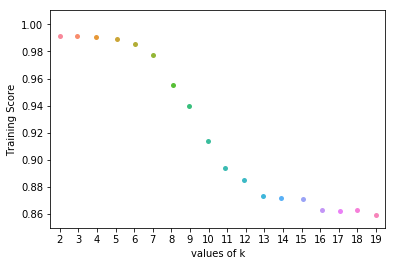

In [8]:
training_plot = sns.stripplot(K_values, training_scores); 
training_plot.set(xlabel ='values of k', ylabel ='Training Score')   
  
plt.show() 

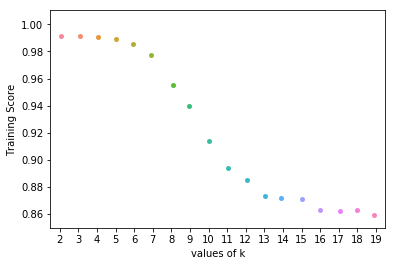

In [9]:
test_plot = sns.stripplot(K_values, training_scores); 
test_plot.set(xlabel ='values of k', ylabel ='Training Score')   
  
plt.show()

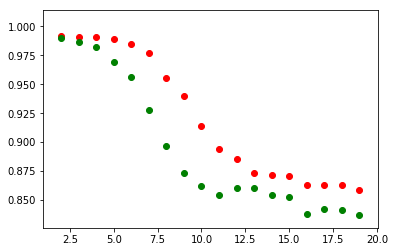

In [10]:
plt.scatter(K_values, training_scores, color ='r') 
plt.scatter(K_values, test_scores, color ='g') 
plt.show()

In [11]:

# score_test = metrics.f1_score(y_test, pred_test, pos_label=list(set(y_test)))
# score_train = metrics.f1_score(y_train, pred_train, pos_label=list(set(y_train)))


print("RANDOM FOREST")
print("Training Accuracy: ",accuracy_train_rf)
print("Testing Accuracy: ",accuracy_test_rf)
print(cm_rf,"\n")

print("SUPPORT VECTOR MACHINES")
print("Training Accuracy: ",accuracy_train_svm)
print("Testing Accuracy: ",accuracy_test_svm)
print(cm_svm,"\n")

print("ONE VS ALL LOGISTIC REGRESSION")
print("Training Accuracy: ",accuracy_train_lr)
print("Testing Accuracy: ",accuracy_test_lr)
print(cm_lr,"\n")

print("ONE VS ALL SVC")
print("Training Accuracy: ",accuracy_train_ovr)
print("Testing Accuracy: ",accuracy_test_ovr)
print(cm_ovr,"\n")

print("K-Nearest Neighbours")
print("Training Accuracy: ",scores[2][0])
print("Testing Accuracy: ",scores[2][1])


RANDOM FOREST
Training Accuracy:  0.9918442077230359
Testing Accuracy:  0.9886892880904857
[[445   7   2]
 [  0 611   2]
 [  2   4 430]] 

SUPPORT VECTOR MACHINES
Training Accuracy:  0.5076564580559254
Testing Accuracy:  0.5129740518962076
[[133 298  23]
 [ 63 514  36]
 [ 68 244 124]] 

ONE VS ALL LOGISTIC REGRESSION
Training Accuracy:  0.5231358189081226
Testing Accuracy:  0.5023286759813705
[[118 238  98]
 [ 57 471  85]
 [ 35 235 166]] 

ONE VS ALL SVC
Training Accuracy:  0.48868175765645805
Testing Accuracy:  0.48303393213572854
[[ 19 238 161]
 [ 15 482 146]
 [  0 217 225]] 

K-Nearest Neighbours
Training Accuracy:  0.9915113182423435
Testing Accuracy:  0.9900199600798403


In [12]:
new_testing_list = []

room1 = pd.read_csv("data_test_room1.csv")
room1["Label"]=[1]*len(room1.index)
new_testing_list.append(room1)

room2 = pd.read_csv("data_test_room2.csv")
room2["Label"]=[2]*len(room2.index)
new_testing_list.append(room2)

room3 = pd.read_csv("data_test_room3.csv")
room3["Label"]=[1]*len(room3.index)
new_testing_list.append(room3)


test_dataset = pd.concat(new_testing_list, axis=0, ignore_index=True)


Xtest = dataset.iloc[:,1:5].values
ytest = dataset.iloc[:,5].values


In [13]:
room1.head()

,TimeStamp,B_x,B_y,B_z,B_net,Label
0,2020/07/19 20:12:02.924,-34,2,-17,38,1
1,2020/07/19 20:12:02.946,-34,2,-17,38,1
2,2020/07/19 20:12:02.968,-34,2,-17,38,1
3,2020/07/19 20:12:02.990,-34,2,-17,38,1
4,2020/07/19 20:12:03.012,-34,1,-18,38,1


In [14]:
room1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6221 entries, 0 to 6220
Data columns (total 6 columns):
TimeStamp    6221 non-null object
B_x          6221 non-null int64
B_y          6221 non-null int64
B_z          6221 non-null int64
B_net        6221 non-null int64
Label        6221 non-null int64
dtypes: int64(5), object(1)
memory usage: 291.7+ KB


In [15]:
room1.describe()

,B_x,B_y,B_z,B_net,Label
count,6221.000000,6221.000000,6221.000000,6221.000000,6221.0
mean,-7.870600,0.400900,-11.548304,37.170069,1.0
std,22.742204,25.591448,4.240722,1.473347,0.0
min,-40.000000,-40.000000,-22.000000,32.000000,1.0
25%,-31.000000,-27.000000,-15.000000,36.000000,1.0
50%,-10.000000,5.000000,-12.000000,37.000000,1.0
75%,10.000000,26.000000,-8.000000,38.000000,1.0
max,37.000000,36.000000,-1.000000,44.000000,1.0


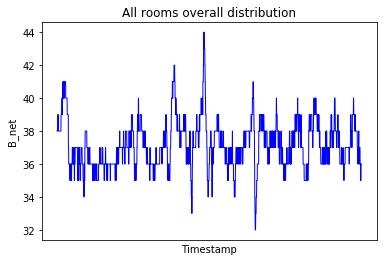

In [21]:
## Visualization 

plt.plot(room1.TimeStamp,room1.B_net,label='Room 1',color='blue',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.ylabel('B_net') 
plt.title('All rooms overall distribution') 
plt.savefig('Room1')
plt.show() 


In [ ]:
plt.plot(room1.TimeStamp,room1.B_net,label='B',color='blue',linewidth='1')
plt.plot(room1.TimeStamp,room1.B_x,label='Bx',color='c',linewidth='1')
plt.plot(room1.TimeStamp,room1.B_y,label='By',color='m',linewidth='1')
plt.plot(room1.TimeStamp,room1.B_z,label='Bz',color='y',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('B') 
plt.title('All dimensions room 1') 
plt.savefig('Room_1')
plt.show() 

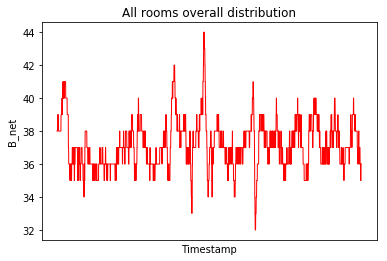

In [27]:
plt.plot(room1.TimeStamp,room1.B_net,label='Room 2',color='red',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('B_net') 
plt.title('All rooms overall distribution') 
plt.savefig('Room2')
plt.show() 

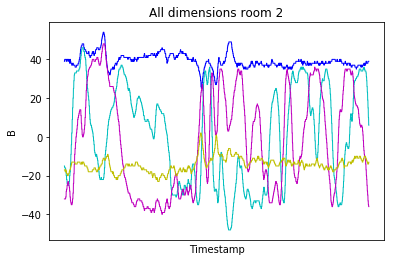

In [23]:
plt.plot(room2.TimeStamp,room2.B_net,label='B',color='blue',linewidth='1')
plt.plot(room2.TimeStamp,room2.B_x,label='Bx',color='c',linewidth='1')
plt.plot(room2.TimeStamp,room2.B_y,label='By',color='m',linewidth='1')
plt.plot(room2.TimeStamp,room2.B_z,label='Bz',color='y',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('B') 
plt.title('All dimensions room 2') 
plt.savefig('Room_2')
plt.show() 

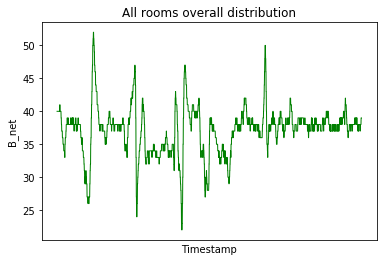

In [29]:
plt.plot(room3.TimeStamp,room3.B_net,label='Room 3',color='green',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,        
    labelbottom=False) 
plt.ylabel('B_net') 
plt.title('All rooms overall distribution') 
plt.savefig('Room3')
plt.show() 

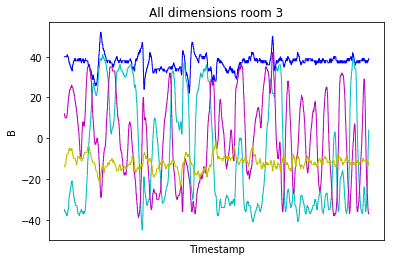

In [24]:
plt.plot(room3.TimeStamp,room3.B_net,label='B',color='blue',linewidth='1')
plt.plot(room3.TimeStamp,room3.B_x,label='Bx',color='c',linewidth='1')
plt.plot(room3.TimeStamp,room3.B_y,label='By',color='m',linewidth='1')
plt.plot(room3.TimeStamp,room3.B_z,label='Bz',color='y',linewidth='1')
plt.xlabel('Timestamp') 
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('B') 
plt.title('All dimensions room 3') 
plt.savefig('Room_3')
plt.show() 

In [30]:
print(len(room1.index))
print(len(room2.index))
print(len(room3.index))

6221
4426
5865


In [31]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

knn_tester = KNeighborsClassifier(n_neighbors = 2) 
knn_tester.fit(X, y) 
   
test_score = knn_tester.score(Xtest, ytest)
train_score = knn_tester.score(X_train,y_train)
print("Training Accuracy: ",train_score)
print("Testing Accuracy: ",test_score)

Training Accuracy:  0.9905126498002663
Testing Accuracy:  0.9904140593795766
